In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [2]:
df1 = pd.read_csv("../datas/bengaluru_house_data.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
#########----Part-1 Data Cleaning ----################################ 06-11-2021

In [3]:
df1.shape  #(rows, column)

(13320, 9)

In [6]:
#group and count total values/elements /instances of each column
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [7]:
#clean dataset by removing some useless columns
#so we create a new dataframe from the dataset

df2 = df1.drop(['area_type', 'society','balcony','availability'], axis = 'columns')
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [11]:
#find the numbur of null value inside each columns
#usefull for data cleaning
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [15]:
#remove missing values from our dataset
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [16]:
df3.shape

(13246, 5)

In [9]:
#show all the available value for a column
 
df3['size'].unique() # in our case, it reveal that, 4 BHK and 4 Bedroom are the same

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [17]:
#make a transformation based on the 'size' column by creating a new column (bhk),
# to represent the size value whatever there is BHK or Bedroom

df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))

/tmp/ipykernel_12243/1893971749.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


In [18]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [19]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [20]:
#display all rows with bhk greather than 20
df3[df3.bhk > 20]

#the answer of this, help us know that there are some errors on our dataset,
# we suppose we can't have over 20 bedroom in a home

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [22]:
# Another issues

#some column has range value; like 'total_sqft' column
df3.total_sqft.unique()

# in such case, we can use / take the average of the two numbers which form/compose the range


array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [23]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [24]:
#to look at values which aren't valid float numbers
# note the '~' caracter we use here to make negative operation

df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [25]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return ( float(tokens[0])+float(tokens[1]) )/2
    try:
        return float(x)
    except:
        return None

In [26]:
convert_sqft_to_num('2100-2850')

2475.0

In [27]:
#make a new dataset by copiing df3

df4 =df3.copy()
# we apply the previous created function
df4['total_sqft'] = df4['total_sqft'].apply(convert_sqft_to_num)

df4.head(410)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
...,...,...,...,...,...,...
409,Sultan Palaya,2 Bedroom,550.0,1.0,62.00,2
410,Kengeri,1 BHK,NaN,1.0,18.50,1
411,Sanne Amanikere,2 BHK,1185.0,2.0,38.00,2
412,Kengeri,2 BHK,750.0,2.0,38.00,2


In [28]:
#find and display data for a specific row using its id
df4.loc[410]

location      Kengeri
size            1 BHK
total_sqft        NaN
bath              1.0
price            18.5
bhk                 1
Name: 410, dtype: object

In [21]:
#######  Part-2 Features Engeneering  ####### 06-11-2021

In [29]:
df5 = df4.copy()
# create a new column on df5 based on the price and total_sqft columns
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']

df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [31]:
#the total number of location that we have in our dataset
#to deal with text data, we can use one-hot encoding
len(df5.location.unique())

1304

In [32]:
#we check the number of rows per location
df5.location = df5.location.apply(lambda x: x.strip())

location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending = False)
location_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [33]:
 # how many location have less than 10 datapoints
len(location_stats[location_stats <=10])

1052

In [34]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [36]:
len(df5.location.unique())

1293

In [37]:
#  let's apply a transformation
# we group all location with less than 10 datapoints into a new column call "other"
df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)

len(df5.location.unique())

242

In [38]:
df5.head(100)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
97,Sarjapura - Attibele Road,3 BHK,1330.0,2.0,48.00,3,3609.022556
98,other,2 BHK,1200.0,2.0,65.00,2,5416.666667
99,other,3 Bedroom,1200.0,3.0,90.00,3,7500.000000
100,Yeshwanthpur,3 BHK,2502.0,3.0,138.00,3,5515.587530


In [39]:
#######  Part-3 Outlier Detection and removal     ####### 07-11-2021

# Some Techniques : Standard deviation , sample domain knownledge

In [31]:
df5[df5.total_sqft/df5.bhk < 300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [40]:
df5.shape

(13246, 7)

In [42]:
df6 = df5[~(df5.total_sqft/df5.bhk < 300)]
df6.shape

(12502, 7)

In [43]:
# check another outlier 
# for example price_per_sqft

In [44]:
#-------so, locate the very low value of the price_per_sqft
df6.price_per_sqft.describe() #difference between describe (property) and describe() (method)

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [36]:
# we write a function to remove the extreme case (very low value of the price_per_sqft) based on standard deviation
# we are going to filtering all thing beyond the standard deviation

In [46]:
# we check it by location

def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft) #m = mean
        st = np.std(subdf.price_per_sqft) # st = standard deviation
        reduced_df = subdf[(subdf.price_per_sqft > (m-st)) & (subdf.price_per_sqft <= (m+st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out

df7 = remove_pps_outliers(df6)
df7.shape

(10241, 7)

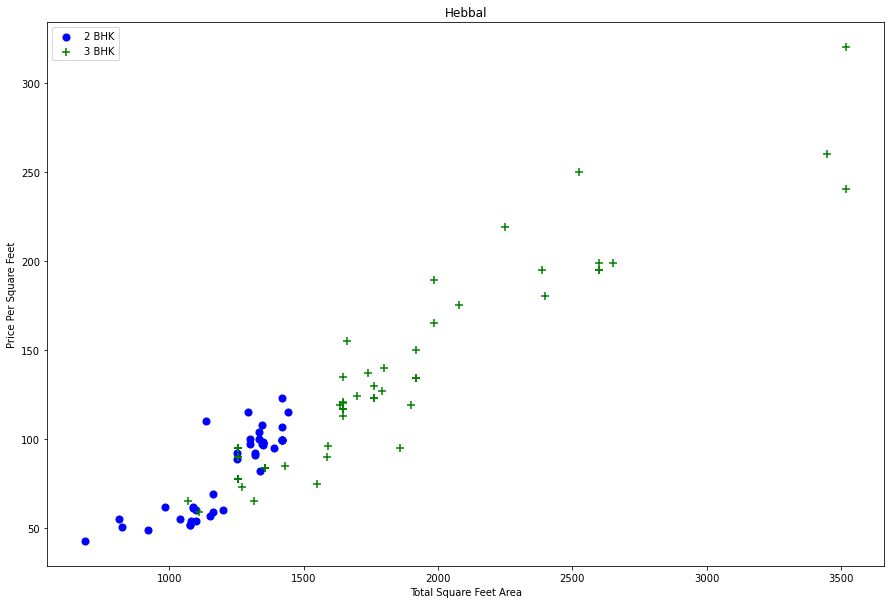

In [49]:
# a function to have a visualization (scartter plot) of how many such cases we have :

def plot_scatter_chart( df, location):
    bhk2 = df[(df.location ==location) & (df.bhk==2)]
    bhk3 = df[(df.location ==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)

    plt.scatter(bhk2.total_sqft, bhk2.price, color='blue' , label ="2 BHK", s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price, color='green' , marker = "+", label ="3 BHK", s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price Per Square Feet")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7, "Hebbal")

#a function to remove observed outlier

we also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square feet area ).What we will do is for a given location, we will build a dictionnary of stats per bhk; i.e.

{
    '1': {
        'mean': 4000,
        'std' : 2000,
        'count' : 34
    },
    '2':{
        'mean': 4300,
        'std' : 2300,
        'count' : 22
    },
}

Now we can remove those 2 BHK apartment whese price_per_sqft is less than mean price_per_sqft of 1 BHK apartment

In [50]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count'] >5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft < (stats['mean'])].index.values) # remove datapoint which value of the price_per_sqft is less than the mean of the previous bhk
    return df.drop(exclude_indices, axis ='index')

df8 = remove_bhk_outliers(df7)

df8.shape

(7329, 7)

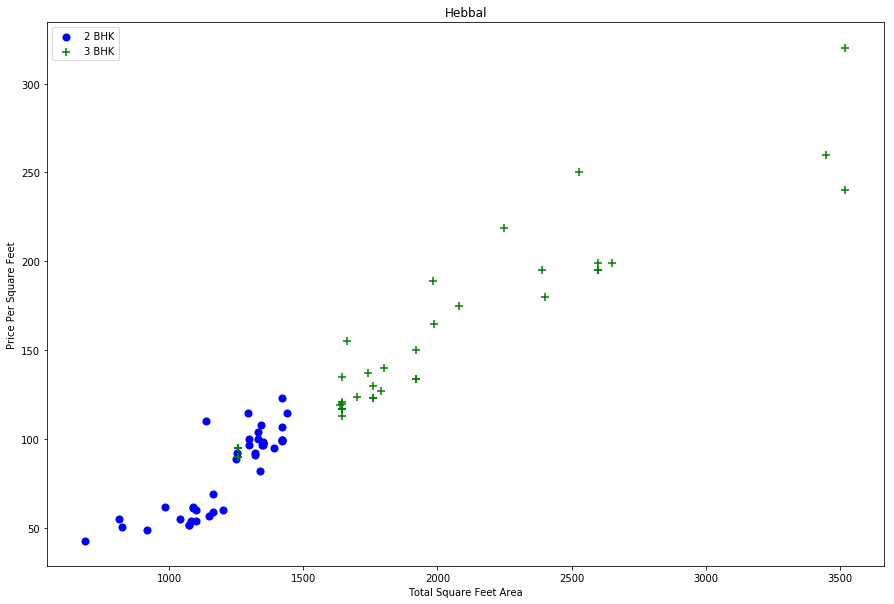

In [40]:
plot_scatter_chart(df8, "Hebbal")

Text(0,0.5,'count')

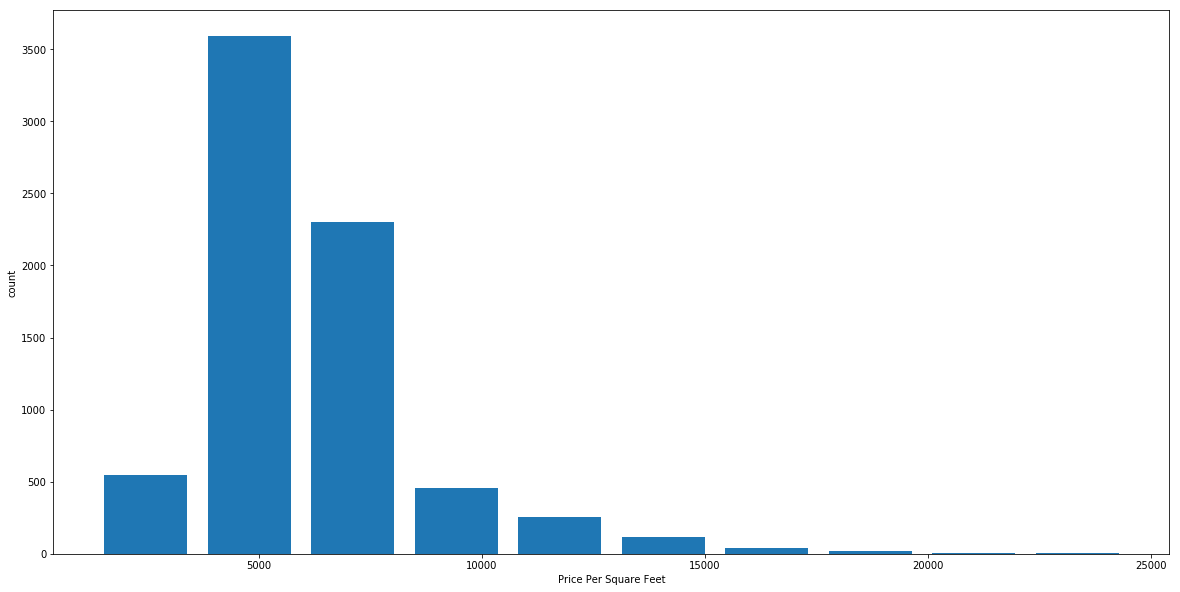

In [41]:
# how many properties/apartment we have per sqft_area

matplotlib.rcParams['figure.figsize'] =(20,10)
plt.hist(df8.price_per_sqft, rwidth =0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel('count')

In [42]:
#let's chexk bath features
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [43]:
df8[df8.bath > 10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'Count')

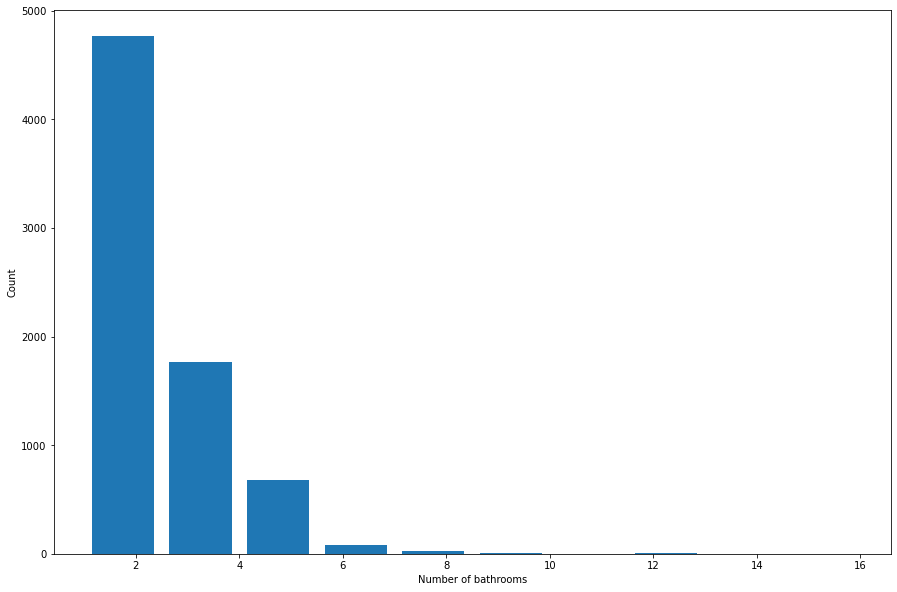

In [51]:
#let's make a few visualization

#matplotlib.rcParams['figure.figsize'] =(60,50)
plt.hist(df8.bath, rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [53]:
#some criterias are use to remove the bath outliers ( i.e : remove bathroom which value = bedromm +2 )
df8[df8.bath > df8.bhk+2] # this will display the outlier

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8411,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [54]:
#we create a new dataframe by removing the previous outlier 

df9 = df8[df8.bath < df8.bhk+2]
df9.shape

(7251, 7)

In [56]:
# Now, we have a clean dataset; 
# Let's remove some features/colums ( size, price_per_sqft) as the have been used just for outlier detection

df10 = df9.drop(['size', 'price_per_sqft'], axis='columns')

df10.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [57]:
#######  Part-4 Model Building     ####### 21-11-2021

#some techniques k-cross Validation; one-hot encodind ( convert text column/data to numeric one) - it also called dummies

In [58]:
#let's use pandas dummies to convert text (location ) to numeric value ==> one-hot encoding

dummies = pd.get_dummies(df10.location)
dummies.head(5)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
 #concat df10 and dummies; remove the 'other' column
df11 = pd.concat( [df10, dummies.drop('other', axis="columns")],axis='columns')
df11.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
 #create another df by removing the 'location' column as we already have its information encoded in news colums when using 'one hot encodind'
df12 = df11.drop('location', axis="columns")
df12.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
#here x variable content only independant variable
#so we remove "price" as it depend on another columns
X = df12.drop('price', axis="columns")
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
df12.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
y = df12.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [67]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=10)

 # test_size=0.2 means that we need 20% of the dataset to be 'sample' and 80% for 'trainning'

In [68]:
from sklearn.linear_model import LinearRegression #we may use Laso Regression, Random Forest ....
lr_clf = LinearRegression()
lr_clf.fit(x_train, y_train)
lr_clf.score(x_test, y_test)

0.845227769787428

In [70]:
# let's use k-cross validation

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

In [79]:
 #we need to try another regression technics to compare validation results
     # we can use GridSearchCV from SkLearn to do it
          # here, we try Lasso and Decision tree regression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
    
     #let's write a function witch tell us witch algorithm the best ( with its bests parameter)
    #Hyperparameter turning

def find_best_model_using_gridsearchcv(X ,y):
    algos =  {
        'linear_regression': {
            'model': LinearRegression(),
            'params':{
                'normalize': [True, False]
            }
        },
        
        'lasso': {
            'model': Lasso(),
            'params':{
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree':{
            'model': DecisionTreeRegressor(),
            'params':{
                'criterion': ['mse', 'friedman_mse'],
                'splitter':  ['best', 'random']
            }
        }
        
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config ['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append( {
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
        
    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

#now let's call our method on our set
        
find_best_model_using_gridsearchcv(X, y)

,model,best_score,best_params
0,linear_regression,0.818354,{'normalize': False}
1,lasso,0.687430,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.718449,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [80]:
#we can cnclude that LinearRegression is the best Algo as it has the best score

In [81]:
X.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [82]:
 # A function to predict prices
    
def predict_price(location, sqft, bath, bhk):
    loc_index = np.where(X.columns== location)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    
    if loc_index >= 0:
        x[loc_index] = 1
    return lr_clf.predict([x])[0]

In [83]:
#try the predict_price function on one location; eg : 1st Phase JP Nagar

In [84]:
predict_price('1st Phase JP Nagar',1000,2,2)

83.49904677167744

In [85]:
predict_price('1st Phase JP Nagar',1000,2,3)

81.72616900743024

In [86]:
predict_price('Indira Nagar',1000,2,2)

181.27815484007039

In [88]:
### Exporting our model
import pickle
with open('banglore_home_prices_model.pickle', 'wb') as f:
    pickle.dump(lr_clf, f)

In [89]:
#we need to export our data (and its structue ) ; this to be used by our web API

import json
columns = {
    'data_columns' :  [col.lower() for col in X.columns]
}

with open("columns.json", "w") as f:
    f.write(json.dumps(columns))